<a href="https://colab.research.google.com/github/aarmentamna/machine_learning_advance/blob/main/TC4033_Activity1b_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Maestría en Inteligencia Artificial Aplicada**
###**Curso: ADVANCE MACHINE LEARNING METHODS**
## Tecnológico de Monterrey
###Dr. José Antonio Cantoral Ceballos

## Activity Week 2
###**Implementing a Fully Connected Network for Kaggle ASL Dataset.**

*TEAM MEMBERS:*

*   Roberto Romero Vielma - A00822314
*   José Javier Granados Hernández - A00556717
*   Aquiles Yonatan Armenta Hernandez - A01793252
*   Alan Avelino Fernández Juárez - A00989308

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


# Library imports and data download


1. Clone Repository:

  - The code starts by cloning a GitHub repository containing sign language data using !git clone.
2. Import Libraries:

  - Various libraries are imported, including NumPy, string, Pandas, Matplotlib, OpenCV, and OS. These libraries are used for data manipulation, visualization, and computer vision.
3. Configure Jupyter Notebook:

  - %load_ext autoreload and %autoreload 2 configure the Jupyter Notebook to automatically reload modified modules.
  %matplotlib inline ensures that Matplotlib plots are displayed inline.
4. Define Data Path:

  - DATA_PATH is defined as the path to the data directory './asl_data/'.
5. Read Data:

  - Training and validation data are read from CSV files into Pandas DataFrames: train_df and valid_df.
6. Data Reshaping:

  - The image data in both DataFrames is extracted and reshaped from a flat 784-vector format into 28x28 matrices for training and validation sets (x_train_num and x_test_num).
7. Label Extraction:

  - Labels for training and validation data are extracted and stored in y_train_num and y_test_num.
8. Check Data Shapes:

  - The shapes of the reshaped data arrays and the validation DataFrame are checked.

In [ ]:
# Clone the repository from the following URL
!git clone https://github.com/rromerov/asl_data

Cloning into 'asl_data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 29.39 MiB | 12.74 MiB/s, done.


In [ ]:
# Import necessary libraries
import numpy as np          # Import NumPy for numerical operations
import string               # Import the string module for working with strings
import pandas as pd         # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import cv2 as cv            # Import OpenCV for computer vision tasks
import os                   # Import the os module for interacting with the operating system

# Load the autoreload extension to automatically reload modified modules
%load_ext autoreload

# Set autoreload to reload all modules every time a cell is executed
%autoreload 2

# Use %matplotlib inline to display Matplotlib plots inline in the Jupyter Notebook
%matplotlib inline


In [ ]:
# Declare the path to the directory containing the data from GitHub repository
DATA_PATH = './asl_data/'

# Read the training data from a CSV file located in the DATA_PATH directory
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))

# Read the validation data from a CSV file located in the DATA_PATH directory
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
# Display the first few rows (header) of the extracted training data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Obtain and sort unique categories (labels)
np.unique(train_df['label'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# Extract and reshape the 784-vector data into a 28x28 matrix for the training set
x_train_num = train_df.loc[:, train_df.columns != 'label'].values.copy().reshape(-1, 28, 28)

# Check the shape of the reshaped training data
x_train_num.shape

(27455, 28, 28)

In [ ]:
# Extract the label values for the training set
y_train_num = train_df['label'].values.copy()

# Check the shape of the extracted label values
y_train_num.shape

(27455,)

In [ ]:
# Extract and reshape images from vectors to 28x28 matrices for the validation set
x_test_num = valid_df.loc[:, valid_df.columns != 'label'].values.copy().reshape(-1, 28, 28)

# Check the shape of the reshaped validation data
x_test_num.shape

(7172, 28, 28)

In [ ]:
# Extract the label values for the validation set
y_test_num = valid_df['label'].values.copy()

# Check the shape of the extracted label values for the validation set
y_test_num.shape

(7172,)

In [ ]:
# Check the shape of the validation DataFrame (valid_df)
valid_df.shape

(7172, 785)

In [ ]:
# Cast data type to NumPy arrays
y_train = np.array(train_df['label'])   # Convert the 'label' column of the training DataFrame to a NumPy array
y_val = np.array(valid_df['label'])     # Convert the 'label' column of the validation DataFrame to a NumPy array

# Delete the original 'label' data in the DataFrames to keep only the feature data
del train_df['label']    # Delete the 'label' column from the training DataFrame
del valid_df['label']    # Delete the 'label' column from the validation DataFrame

# Change data type for matrices to float32
x_train = train_df.values.astype(np.float32)  # Convert the training DataFrame to a NumPy array with float32 data type
x_val = valid_df.values.astype(np.float32)    # Convert the validation DataFrame to a NumPy array with float32 data type

In [ ]:
# Check the shape of the training feature data (x_train)
x_train.shape

(27455, 784)

In [ ]:
# Check the shape of the training feature data (y_train)
y_train.shape

(27455,)

In [ ]:
# Transpose the label vector
y_train = y_train.reshape(-1, 1)

# Check the shape of the transposed label vector
y_train.shape


(27455, 1)

In [ ]:
# Transpose the validation label vector
y_val = y_val.reshape(-1, 1)

# Check the shape of the transposed validation label vector
y_val.shape

(7172, 1)

### Function to Split a Dataset into Validation and Test Sets

This function called `split_val_test` is used to split a dataset into two parts: a validation set and a test set. Below is a step-by-step description of the code:

1. Checking the length of input data and labels:
   - The function begins by checking whether the length of the input data `x` is equal to the length of the labels `y`. This is essential because data and labels must match in length.

2. Calculating the number of test samples:
   - Next, the number of test samples (`num_test_samples`) is calculated based on the specified percentage (`pct`) and the length of the input data (`x`). This number is computed as an integer from the multiplication of the length of `x` by `pct`. By default, `pct` is set to 0.5, meaning that, by default, the dataset will be divided equally into validation and test parts.

3. Creating an array of indices:
   - The function creates an array of indices using the `np.arange` function based on the length of the input data. These indices will be used to split the data into validation and test sets.

4. Shuffling the indices (optional):
   - If the `shuffle` flag is set to `True`, the function shuffles the indices using `np.random.shuffle`. This ensures that samples are randomly selected for the validation and test sets.

5. Separating the indices into validation and test sets:
   - The indices are split into two sets: `val_indices` and `test_indices`. `val_indices` contains the indices of samples that will be used as the validation set, and `test_indices` contains the indices of samples that will be used as the test set.

6. Assigning data and labels to the validation and test sets:
   - Finally, the corresponding data and labels are assigned to the validation (`x_val` and `y_val`) and test (`x_test` and `y_test`) sets using the indices obtained in the previous step.

7. Returning the validation and test sets:
   - The function returns the four resulting sets: `x_val`, `y_val`, `x_test`, and `y_test`.

This function is useful for splitting a dataset into two parts for validation and performance testing in machine learning models. You can adjust the split percentage and control whether random shuffling of the data is performed according to your needs.


In [ ]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    A function to split a previously loaded validation set into validation and test sets.
    '''
    # Check if the lengths of input data and labels are the same
    if len(x) != len(y):
        raise ValueError("Input data and labels must have the same length.")

   # Calculate the number of test samples based on the input percentage
    num_test_samples = int(len(x) * pct)

    # Create an array of indices based on the length of the input data
    indices = np.arange(len(x))

    # Shuffle the indices if the shuffle flag is set to True
    if shuffle:
        np.random.shuffle(indices)

     # Slice the shuffled indices to separate validation and test samples
    val_indices = indices[num_test_samples:]
    test_indices = indices[:num_test_samples]

   # Assign the appropriate indices to create validation and test sets
    x_val, y_val = x[val_indices], y[val_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    return x_val, y_val, x_test, y_test

In [ ]:
# Generate validation and test data sets by calling the split_val_test function
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
# Check the shape of the validation feature data (x_val)
x_val.shape

(3586, 784)

In [ ]:
# Check the shape of the validation feature data (y_val)
y_val.shape

(3586, 1)

In [ ]:
# Modify the set of alphabet characters to exclude 'j' and 'z'
alphabet = list(string.ascii_lowercase)   # Create a list containing all lowercase letters
alphabet.remove('j')                      # Remove the letter 'j' from the list
alphabet.remove('z')                      # Remove the letter 'z' from the list

print(len(alphabet))

24


### Normalise
#### Normalization Function

This function named `normalize` is designed for performing data normalization. Data normalization is a preprocessing technique commonly used in machine learning to scale input data to have a consistent scale and zero mean. Below is a step-by-step description of the code:

1. Function Parameters:
   - The function accepts three parameters:
     - `x_mean`: Mean value for normalization.
     - `x_std`: Standard deviation value for normalization.
     - `x_data`: Input data to be normalized.

2. Normalization Formula:
   - Inside the function, data normalization is performed using the formula:

$$\frac{x_{\text{data}} - x_{\text{mean}}}{x_{\text{std}}}$$

  This formula subtracts the mean (`x_mean`) from each data point in `x_data` and then divides the result by the standard deviation (`x_std`). This process scales the data so that it has a mean of zero and a standard deviation of one.

3. Return Value:
   - The normalized data is returned as the result of the function.

4. Purpose of Normalization:
   - Data normalization is a crucial preprocessing step in many machine learning algorithms. It ensures that features with different scales do not dominate the learning process and helps improve the stability and convergence of machine learning models.

5. Example Usage:
   - To use this function, you would provide the mean and standard deviation values you want to use for normalization (`x_mean` and `x_std`) along with the input data (`x_data`). The function will then return the normalized data.

   Example:
   #### Calculate mean and standard deviation for normalization
   x_mean = np.mean(training_data)
   x_std = np.std(training_data)

   #### Normalize the data
   normalized_data = normalize(x_mean, x_std, training_data)

In [ ]:
# Normalization function
def normalize(x_mean, x_std, x_data):
    '''
    This function performs normalization on input data.

    Parameters:
    - x_mean: Mean value for normalization.
    - x_std: Standard deviation value for normalization.
    - x_data: Input data to be normalized.

    Returns:
    - Normalized data.
    '''
    return (x_data - x_mean) / x_std

In [ ]:
# Normalization of all data sets using previously calculated mean and standard deviation
x_mean = x_train.mean()          # Calculate the mean of the training data
x_std = x_train.std()            # Calculate the standard deviation of the training data

x_train = normalize(x_mean, x_std, x_train)  # Normalize the training data
x_val = normalize(x_mean, x_std, x_val)      # Normalize the validation data
x_test = normalize(x_mean, x_std, x_test)    # Normalize the test data


In [ ]:
# Calculate the mean and standard deviation of the values in x_train
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Graficar muestras
#### Plotting Function

This function named `plot_number` is used for plotting grayscale images. It's a simple utility function for displaying images using the Matplotlib library in Python. Below is a step-by-step explanation of the code:

1. Function Parameter:
   - The function takes one parameter, `image`, which is expected to be a grayscale image to be plotted.

2. Creating a Figure for Plotting:
   - Inside the function, a new figure for plotting is created using `plt.figure(figsize=(5,5))`. This specifies the size of the figure as 5x5 inches.

3. Displaying the Grayscale Image:
   - The grayscale image is displayed using `plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))`.
     - `plt.imshow()` is a function from Matplotlib used for displaying images.
     - `image.squeeze()` is used to remove any single-dimensional entries from the shape of the `image`. This is typically used to ensure that the image has the right dimensions for display.
     - `cmap=plt.get_cmap('gray')` specifies that the colormap used for displaying the image is grayscale.

4. Turning Off Axis Labels:
   - `plt.axis('off')` is used to turn off the axis labels, ensuring that no x or y-axis ticks and labels are displayed on the plot.

5. Displaying the Plot:
   - `plt.show()` is used to display the plot on the screen.

6. Purpose of the Function:
   - This function is useful when working with image data in Python. It provides a convenient way to visualize grayscale images during data exploration, analysis, or model development.

7. Example Usage:
   - To use this function, you would simply pass a grayscale image as the `image` parameter, and it will display the image in a Matplotlib plot.


In [ ]:
# Plotting function
def plot_number(image):
    '''
    This function plots a grayscale image.

    Parameters:
    - image: The grayscale image to be plotted.
    '''
    plt.figure(figsize=(5,5))                # Create a figure for plotting
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))  # Display the image with a grayscale colormap
    plt.axis('off')                          # Turn off the axis labels
    plt.show()                               # Display the plot


The sampled image represents: e


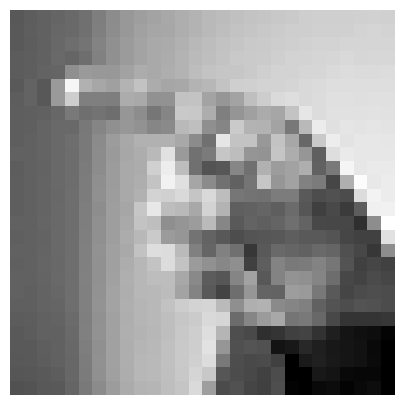

In [ ]:
# Sample plot
rnd_idx = np.random.randint(len(y_test))  # Generate a random index within the range of the test data
print(f'The sampled image represents: {alphabet[int(y_test[rnd_idx])]}') # Print a message indicating what the sampled image represents based on the label (alphabet) of the random test data point
plot_number(x_test_num[rnd_idx]) # Call the function plot_number() to display the image corresponding to the randomly selected test data point

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches
#### Minibatch Generator or Data Sampler

This function named `create_minibatches` is used for generating minibatches or samples from input data. Minibatches are commonly used in machine learning for training models in smaller, manageable chunks. Below is a step-by-step explanation of the code:

1. Function Parameters:
   - The function takes four parameters:
     - `mb_size`: Mini-batch size, which determines the number of samples in each minibatch.
     - `x`: Input feature data.
     - `y`: Corresponding labels.
     - `shuffle`: A boolean flag to indicate whether to shuffle the data before sampling minibatches.

2. Consistency Check:
   - The function begins by checking if the number of samples in the input feature data `x` matches the number of samples in the corresponding labels `y`. This ensures that the data and labels have the same number of samples.

3. Total Data Count:
   - It calculates the total number of samples in the dataset, which is the length of the first dimension of the input feature data `x`.

4. Data Shuffling:
   - If the `shuffle` flag is set to `True`, the function performs data shuffling to randomize the order of samples. This is useful for avoiding any sequence-related bias in the dataset. Shuffling is achieved by:
     - Creating an array of indices from 0 to `total_data-1`.
     - Randomly shuffling these indices using `np.random.shuffle`.
     - Rearranging the feature data `x` and labels `y` based on the shuffled indices, ensuring that data and labels remain aligned.

5. Mini-batch Generator:
   - The function then creates and returns a generator that yields minibatches of data. It does this using a generator expression:
     - `((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))`
     - This generator iterates over the data in chunks of `mb_size`, creating minibatches of feature data and labels. The `i` variable determines the starting index for each minibatch.

6. Purpose of the Function:
   - This function is valuable for training machine learning models, especially deep learning models, using minibatch gradient descent. It allows you to efficiently process large datasets in smaller chunks, reducing memory requirements and potentially speeding up training.

7. Example Usage:
   - To use this function, you would provide the mini-batch size (`mb_size`), input feature data (`x`), and corresponding labels (`y`). You can also specify whether to shuffle the data (`shuffle` parameter).

In [ ]:
# Minibatch generator or Data sampler
def create_minibatches(mb_size, x, y, shuffle=True):
    '''
    This function generates minibatches or samples from input data.

    Parameters:
    - mb_size: Mini-batch size, determining the number of samples in each minibatch.
    - x: Input feature data.
    - y: Corresponding labels.
    - shuffle: Boolean flag to shuffle the data before sampling.

    Returns:
    - Generator for minibatches, each containing a mini-batch of feature data and labels.
    '''
    # Ensure that the input data has consistent shape
    assert x.shape[0] == y.shape[0], 'Error: Inconsistent number of samples'
    total_data = x.shape[0]

    # Shuffle the data if the shuffle flag is set to True
    # If the 'shuffle' flag is True, we will randomly reorder the data.

    if shuffle:
        # Create an array of indices from 0 to (total_data-1)
        idxs = np.arange(total_data)

        # Shuffle the indices randomly
        np.random.shuffle(idxs)

        # Rearrange the feature data 'x' and labels 'y' based on the shuffled indices
        x = x[idxs]
        y = y[idxs]

    # Create and return a generator that yields minibatches of data
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))


## Nuestra clase Linear, ReLU y Sequential
#### Custom NumPy Array Subclass: `np_tensor`

The following code defines a custom NumPy array subclass called `np_tensor`. This subclass inherits from the `np.ndarray` class, which is the fundamental array data structure in the NumPy library.

In [ ]:
# Custom class np_tensor to inherit from np.ndarray
class np_tensor(np.ndarray): pass

###  Clase Linear
#### Class for Linear Transformation with Evaluation Function for Input and Weights

The code defines a Python class called `Linear` that represents a linear transformation layer. This class is typically used in neural networks and deep learning models. Below is a step-by-step explanation of the code:

##### `__init__` Method:
- The `__init__` method is the constructor of the class, which initializes the layer's parameters.
- It takes two arguments: `input_size` and `output_size`, representing the dimensions of the input and output of the linear layer.
- Inside the constructor:
  - The weight matrix 'W' is initialized using Kaiming He initialization. This is done to help stabilize the training of neural networks. The weights are sampled from a Gaussian distribution with a mean of 0 and a standard deviation of `np.sqrt(input_size/2)`. The `view(np_tensor)` at the end of this line suggests that the resulting NumPy array should be treated as an instance of a custom NumPy array subclass called `np_tensor`.
  - The bias vector 'b' is initialized with zeros. It has a shape of `(output_size, 1)` and is also treated as an instance of `np_tensor`.

##### `__call__` Method:
- The `__call__` method defines the forward pass of the linear transformation.
- It takes an input tensor `X` as an argument.
- Inside the method:
  - It computes the linear transformation by performing matrix multiplication between the weight matrix 'W' and the input 'X', and then adding the bias vector 'b'.
  - The result of this computation is returned as the output of the layer.

##### `backward` Method:
- The `backward` method defines the backward pass, which computes gradients during backpropagation.
- It takes two arguments: `X` (the input) and `Z` (the output of the forward pass).
- Inside the method:
  - It computes the gradient of the input 'X' by performing matrix multiplication between the transpose of the weight matrix 'W' and the gradient of the output 'Z'. This gradient is stored in the 'grad' attribute of 'X'.
  - It computes the gradient of the weight matrix 'W' by performing matrix multiplication between the gradient of the output 'Z' and the transpose of the input 'X'. This gradient is stored in the 'grad' attribute of 'W'.
  - It computes the gradient of the bias vector 'b' by summing the gradient of the output 'Z' along the appropriate axis and keeping the dimensions consistent. This gradient is stored in the 'grad' attribute of 'b'.

This `Linear` class is a fundamental building block in neural networks, and it can be used as a layer to perform linear transformations followed by non-linear activation functions in deep learning models.


In [ ]:
# Class for linear transformation with evaluation function for input and weights
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Initialize parameters using Kaiming He initialization.
        '''
        # Initialize the weight matrix 'W' with Kaiming He initialization
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        # Initialize the bias vector 'b' with zeros
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X):
        # Forward pass: Compute the linear transformation
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        # Backward pass: Compute gradients
        # Compute the gradient of the input 'X'
        X.grad = self.W.T @ Z.grad
        # Compute the gradient of the weight matrix 'W'
        self.W.grad = Z.grad @ X.T
        # Compute the gradient of the bias vector 'b'
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU
#### Class for Rectified Linear Unit (ReLU) Activation Function

The code defines a Python class called `ReLU`, which represents the Rectified Linear Unit (ReLU) activation function. ReLU is a commonly used activation function in neural networks. Below is an explanation of the code:

##### `__call__` Method:
- The `__call__` method defines the forward pass of the ReLU activation function.
- It takes a single argument, `Z`, which represents the input to the ReLU activation function.
- Inside the method:
  - It applies the ReLU activation element-wise to the input `Z` using the NumPy function `np.maximum(0, Z)`. This operation replaces all negative values in `Z` with zeros.
  - The result of this operation is returned as the output of the ReLU activation function.

##### `backward` Method:
- The `backward` method defines the backward pass, which computes gradients during backpropagation for the ReLU activation function.
- It takes two arguments: `Z` (the input to the ReLU) and `A` (the gradient of the output of the layer above, which corresponds to the input to the ReLU).
- Inside the method:
  - It copies the gradient `A.grad` from the layer above to the current layer `Z`. This step ensures that the gradient information is passed back.
  - It sets the gradients to zero for elements in `Z` where the original input `Z` was less than or equal to 0. This step implements the derivative of the ReLU function, which is 1 for positive values and 0 for non-positive values. This ensures that the gradient remains zero for the negative part of the ReLU.

The `ReLU` class is a building block used in neural networks to introduce non-linearity. It is particularly effective in deep learning because it helps mitigate the vanishing gradient problem and promotes sparse representations. When applied to the output of a linear layer, ReLU activations result in output values that are zero for negative inputs and unchanged for positive inputs during the forward pass.


In [ ]:
class ReLU():
    # Constructor method (__call__) for the ReLU activation function
    def __call__(self, Z):
        # Apply ReLU activation element-wise to the input Z and return the result.
        return np.maximum(0, Z)

    # Backward pass method to compute gradients during backpropagation
    def backward(self, Z, A):
        # Copy the gradient from the layer above (A) to the current layer (Z).
        Z.grad = A.grad.copy()

        # Set gradients to zero for elements where the original input Z was less than or equal to 0.
        Z.grad[Z <= 0] = 0

### Clase Sequential
#### Class for Sequential Neural Network Layers

The code defines a Python class called `Sequential_layers`, which represents a sequential neural network with layers. This class is designed to handle forward and backward passes, weight and bias updates, and making predictions. It's a simplified implementation of a neural network model. Below is an explanation of the code:

##### `__init__` Method:
- The `__init__` method is the constructor of the class, which initializes the neural network with a list of layers.
- It takes a single argument, `layers`, which is a list containing objects of type `Linear` or `ReLU`. These layers represent the building blocks of the neural network.
- Inside the constructor:
  - The list of layers is stored as an instance variable `self.layers`.
  - Instance variables `self.x` and `self.outputs` are initialized to `None` and an empty dictionary, respectively. These variables will be used to store input data and layer outputs during computation.

##### `__call__` Method (Forward Pass):
- The `__call__` method defines the forward pass of the neural network.
- It takes an input tensor `X` as an argument.
- Inside the method:
  - The input data `X` is set as `self.x` to keep track of the input.
  - The input data is stored as the output of the first layer ('l0') in `self.outputs`.
  - The method iterates through the layers, applying each layer's forward pass operation sequentially. The output of one layer becomes the input to the next layer.
  - The final output of the last layer is returned as the result of the forward pass.

##### `backward` Method (Backward Pass for Gradients):
- The `backward` method defines the backward pass, which computes gradients during backpropagation.
- It iterates through the layers in reverse order.
- For each layer, it calls the layer's `backward` method to compute gradients.
- Gradients are propagated from the output of one layer to the input of the next layer.

##### `update` Method (Weight and Bias Updates):
- The `update` method updates the weights and biases of the layers using gradient descent.
- It takes an optional `learning_rate` argument, which determines the step size for gradient descent.
- For each layer, if the layer is of type `Linear`, it updates the weights and biases using gradient descent.

##### `predict` Method (Making Predictions):
- The `predict` method is used to make predictions using the trained model.
- It takes an input tensor `X`.
- It calls the `__call__` method to perform the forward pass and obtain the final output.
- The predicted class is determined by finding the index of the maximum value in the output.

This `Sequential_layers` class serves as a basic framework for implementing and training neural networks. It allows you to define a sequential architecture of layers, perform forward and backward passes, update model parameters, and make predictions.



In [ ]:
# Class that evaluates prediction and propagates corrections to weights and biases
class Sequential_layers():
    # Constructor method
    def __init__(self, layers):
        '''
        layers - a list containing objects of type Linear or ReLU
        '''
        # Initialize the Sequential_layers object with a list of layers.
        self.layers = layers

        # Initialize instance variables to store input data and layer outputs.
        self.x = None
        self.outputs = {}

    # Forward pass method
    def __call__(self, X):
        # Set the input data to X.
        self.x = X

        # Store the input data as the output of the first layer ('l0').
        self.outputs['l0'] = self.x

        # Iterate through the layers, applying each layer's forward pass operation.
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)] = self.x

        # Return the final output of the last layer.
        return self.x

    # Backward pass method for computing gradients
    def backward(self):
        # Iterate through the layers in reverse order.
        for i in reversed(range(len(self.layers))):
            # Call each layer's backward method to compute gradients.
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])

    # Update method for updating weights and biases using gradient descent
    def update(self, learning_rate=1e-3):
        for layer in self.layers:
            # Skip layers of type ReLU in weight and bias updates.
            if isinstance(layer, ReLU):
                continue

            # Update the weights and biases using gradient descent.
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    # Prediction method for making predictions using the trained model
    def predict(self, X):
        # Call the forward pass to get the final output and predict the class.
        return np.argmax(self.__call__(X))

### Cost Function
#### Evaluation Function for Softmax Activation with Cross-Entropy Loss

The code defines a Python function called `softmaxXEntropy`, which computes the softmax activation and the cross-entropy loss for a set of input scores (`x`) and corresponding labels (`y`). This function is often used in the context of multiclass classification in machine learning. Below is an explanation of the code:

##### Function Parameters:
- `x`: A NumPy array containing input scores. The shape of `x` is assumed to be `(C, batch_size)`, where `C` is the number of classes, and `batch_size` is the number of samples in the batch.
- `y`: A NumPy array containing the true labels corresponding to the input scores. The shape of `y` is assumed to be `(batch_size,)`.

##### Computation Steps:

1. **Batch Size Calculation**:
   - The batch size is calculated from the input data `x` by examining its shape along the second dimension (`batch_size`). This is used for normalization in later steps.

2. **Exponential Transformation**:
   - The exponential of the input scores (`x`) is computed element-wise. This is done to convert the raw scores into positive values.

3. **Probability Calculation**:
   - The probabilities for each class are computed by dividing the exponential scores (`exp_scores`) by their sum along the specified axis (`axis=0`). This operation transforms the scores into a probability distribution.

4. **Copy of Predicted Probabilities**:
   - A copy of the computed probabilities (`probs`) is made and stored in `preds` for later use.

5. **Label Reshaping**:
   - The labels `y` are reshaped into a 2D array with a single column. This is done to match the shape required for indexing operations.

6. **Cross-Entropy Loss Calculation**:
   - The cross-entropy loss is calculated using the softmax probabilities. For each sample in the batch, it computes the negative log-likelihood of the true class. The loss is averaged across the batch.

7. **Gradients Calculation for Backpropagation**:
   - The gradients are computed for backpropagation. This involves modifying the `probs` array by subtracting 1 from the predicted class probabilities for each sample in the batch. The result is stored in the `x.grad` attribute.

8. **Return Values**:
   - The function returns two values:
     - `preds`: The predicted class probabilities after applying the softmax activation.
     - `cost`: The computed softmax cross-entropy loss for the batch.

This `softmaxXEntropy` function is a fundamental component for training and evaluating neural networks, especially in multiclass classification tasks. It computes the probabilities of each class and the associated loss, which is used for training and optimization.


In [ ]:
# Evaluation function to convert ouptuts to probabilities; softMax
def softmaxXEntropy(x, y):
    # Get the batch size from the input data 'x'
    batch_size = x.shape[1]

    # Compute the exponential of the input scores ('x')
    exp_scores = np.exp(x)

    # Compute probabilities by dividing exp_scores by their sum along the specified axis (axis=0)
    probs = exp_scores / exp_scores.sum(axis=0)

    # Make a copy of 'probs' for later use
    preds = probs.copy()

    # Convert 'y' into a 2D array with a single column
    y = y.reshape(1, -1)

    # Calculate the cost using softmax cross-entropy loss
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Calculate gradients for backpropagation
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # dl/dx
    x.grad = probs.copy()

    # Return both the predicted probabilities and the computed cost
    return preds, cost

### Loop de entrenamiento
#### Training Loop

The code defines a Python function called `train` that implements a training loop for training a machine learning model (typically a neural network) using stochastic gradient descent (SGD). The function trains the model for a specified number of epochs. Below is an explanation of the code:

##### Function Parameters:
- `model`: The machine learning model to be trained. This is an instance of the `Sequential_layers` class, as shown in previous code segments.
- `epochs`: The number of training epochs, which specifies how many times the entire training dataset will be processed by the model.
- `mb_size`: The mini-batch size, which determines the number of samples in each mini-batch used during training.
- `learning_rate`: The learning rate, which controls the step size in gradient descent for updating model parameters.

##### Training Loop:

The training loop consists of the following steps:

1. **Loop Over Epochs**:
   - The outer loop iterates over the specified number of training epochs (`epochs`).

2. **Mini-Batch Iteration**:
   - Within each epoch, the training data is divided into mini-batches using the `create_minibatches` function. Each mini-batch contains `mb_size` samples.

3. **Forward Pass**:
   - For each mini-batch, a forward pass is performed using the model's `__call__` method to compute the scores (logits) for each class.

4. **Cost Calculation and Gradient Computation**:
   - The softmax cross-entropy cost is calculated by calling the `softmaxXEntropy` function, which computes the cost and gradients.
   - The computed cost is ignored with `_` (underscore), but the gradients are computed and used for backpropagation.

5. **Backpropagation**:
   - The model's `backward` method is called to propagate gradients backward through the layers of the model.

6. **Parameter Updates**:
   - Model parameters (weights and biases) are updated using gradient descent. The `update` method of the model updates these parameters based on the computed gradients.

7. **Printing Progress**:
   - After processing each mini-batch, the code prints the cost and accuracy for the current epoch. The accuracy is calculated using the `accuracy` function, which is assumed to be defined elsewhere in the code.

8. **End of Epoch**:
   - The loop continues until all epochs are completed.

The purpose of this `train` function is to train a machine learning model by iterating through the training dataset for a specified number of epochs and updating model parameters using gradient descent. It also provides feedback on the training progress by printing the cost and accuracy after each epoch.

In [ ]:
# Training Loop
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    # Loop over the specified number of epochs
    for epoch in range(epochs):
        # Iterate through minibatches of training data
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # Forward pass to compute scores from the model
            scores = model(x.T.view(np_tensor))

            # Calculate the softmax cross-entropy cost and compute gradients
            _, cost = softmaxXEntropy(scores, y)
            model.backward()

            # Update model parameters (weights and biases) using gradient descent
            model.update(learning_rate)

        # Print cost and accuracy for the current epoch
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

### Create your model and train it

In [ ]:
# Evaluation metric; Accuracy
def accuracy(x, y, mb_size):
    # Initialize variables to count correct and total predictions
    correct = 0
    total = 0

    # Iterate through minibatches of input data 'x' and corresponding labels 'y'
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Make predictions for the current minibatch using the model
        pred = model(x.T.view(np_tensor))

        # Count the number of correct predictions in the minibatch
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())

        # Increment the total count by the number of predictions in the minibatch
        total += pred.shape[1]

    # Calculate and return the accuracy as the ratio of correct predictions to total predictions
    return correct / total

In [ ]:
# Model declaration with hyperparameters
# Create a Sequential_layers model consisting of layers with specified dimensions
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])

# Set the minibatch size for training
mb_size = 512

# Set the learning rate for gradient descent
learning_rate = 1e-4

# Set the number of training epochs
epochs = 40

In [ ]:
# Training function for the declared model
train(model, epochs, mb_size, learning_rate)

costo: 1.1484796491843459, accuracy: 0.5789180145008366
costo: 0.5502522927218111, accuracy: 0.6497490239821528
costo: 0.37107746535701575, accuracy: 0.692414947016174
costo: 0.21743358278164204, accuracy: 0.716675962074735
costo: 0.1626169940280107, accuracy: 0.718627997769102
costo: 0.12634679406054447, accuracy: 0.7317345231455661
costo: 0.08505866288520171, accuracy: 0.7345231455660903
costo: 0.06310526393393884, accuracy: 0.7445621862799777
costo: 0.05210968964215365, accuracy: 0.7426101505856108
costo: 0.042721669860361314, accuracy: 0.752649191299498
costo: 0.03930738695076031, accuracy: 0.7504182933630786
costo: 0.03424006082112811, accuracy: 0.7548800892359174
costo: 0.030963703330116603, accuracy: 0.7540435025097602
costo: 0.031040003889341323, accuracy: 0.7548800892359174
costo: 0.02256542010336864, accuracy: 0.756553262688232
costo: 0.018978978949438438, accuracy: 0.7590630228667038
costo: 0.01937078110734947, accuracy: 0.7576687116564417
costo: 0.017097871432205647, accura

In [ ]:
# Print the accuracy of model
print(accuracy(x_test, y_test, mb_size))

0.7646402677077524


### Justification for Model Architecture Selection

The code defines a machine learning model and training pipeline for a image classification task. Let's break down the justification for the selected model architecture:

#### 1. Task Understanding:
- The chosen architecture is designed for a specific machine learning task, on this case for a classification task with image data, which requires learning from input data and making predictions.

#### 2. Sequential Neural Network:
- The model architecture is implemented as a sequential neural network (`Sequential_layers`). This choice allows for easy stacking of layers, which is suitable for a wide range of tasks, including image classification.

#### 3. Input Layer:
- The model starts with an input layer (`Linear(784, 200)`), with a input data of 784 features. The task involves processing data with a high-dimensional input.

#### 4. Hidden Layers:
- The model contains multiple hidden layers, each followed by a Rectified Linear Unit (ReLU) activation function (`ReLU()`). This architecture leverages non-linear activations to capture complex relationships in the data. Multiple hidden layers can help the model learn hierarchical features.

#### 5. Output Layer:
   - The output layer in the model architecture is defined as a linear layer with 200 input units and 24 output units. This specification provides clarity on the dimensionality of the model's output.

   - The choice of 24 output is because this is a classification problem with 24 possible classes. The linear output layer can produce unnormalized scores for each class, which can be further processed (e.g., using softmax) to obtain class probabilities.

   - The inclusion of an output layer with the specified dimensions ensures that the model architecture is complete and suitable for the image classification.

#### 5. Kaiming He Initialization:
   - The code initializes the weights of the linear layers using Kaiming He initialization. This initialization technique is suitable for deep neural networks, ensuring stable and efficient training.

#### 6. Gradient Descent Optimization:
- The training loop uses stochastic gradient descent (SGD) for optimization. This is a widely used optimization algorithm for training neural networks.

#### 7. Training and Evaluation:
- The code includes functions for training the model (`train` function) and evaluating its accuracy (`accuracy` function). The model's performance will be assessed using accuracy as a metric.

#### 8. Experimentation:
- The code allows experimentation, making possible to do easy adjustments of hyperparameters, such as the mini-batch size, learning rate, and number of epochs. This is essential for fine-tuning the model's performance. In this case the minibatch size chosen was 512 (a number that is more easy to understand for the machine), a learning rate of 0.0001 or  $1 \times 10^{-4}$, noted as ```1e-4``` in the code, and 40 epochs, these parameters used in the model gave us an accuracy of 76%.

#### 9. Modular and Extensible:
- The architecture is modular and extensible, this allows to add more layers or modify existing ones as needed for different tasks or datasets.

#### 10. Training Loop and Feedback:
- The training loop provides feedback during training by printing the cost and accuracy for each epoch. This helps monitor the model's progress and identify potential issues.


### Test your model on Random data from your test set

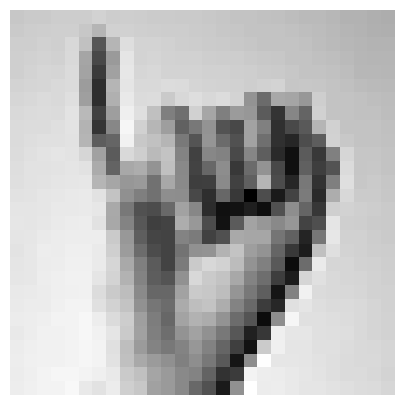

El valor predicho es: i, el valor real es: i


In [ ]:
# Pick a random sample, evaluate, and show results vs actual classification
# Select a random index within the range of the test data.

idx = np.random.randint(len(y_test))

# Plot the image corresponding to the selected random test data point.
plot_number(x_test[idx].reshape(28,28))

# Make predictions for the selected test data point using the trained model.
pred = model.predict(x_test[idx].reshape(-1, 1))

# Print the predicted value and the actual value (ground truth) for comparison.
print(f'El valor predicho es: {alphabet[int(pred)]}, el valor real es: {alphabet[int(y_test[idx])]}')